<a href="https://colab.research.google.com/github/windopper/NerualNetworkPracticeInJupyter/blob/main/DeepLeaning/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference https://wikidocs.net/49071


# 다층 퍼셉트론 (MultiLayer Perceptron, MLP)

단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론이라고 하며, 다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태임

피드 포워드 신경망은 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말함

# 케라스의 texts_to_matrix() 이해하기

위 텍스트 데이터에 대해서 정수 인코딩 수행

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


texts_to_matrix()는 입력된 텍스트 데이터로부터 행렬을 만드는 도구임

4개의 모드를 지원하는데 'binary', 'count', 'freq', 'tfidf'로 총 4개임

count를 사용하면,

In [3]:
print(tokenizer.texts_to_matrix(texts, mode='count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


'count'를 사용하면 문서 단어 행렬 (Document-Term Matrix, DTM)을 생성함. DTM에서의 인덱스는 앞서 확인한 word_index의 결과. 주의할 점으로 각 단어의 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작함. 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문에 DTM의 첫번째 인덱스는 모두 0.

또한 단어가 등장한 수에 따라 인덱스의 값이 결정됨

In [4]:
print(tokenizer.texts_to_matrix(texts, mode='binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


'binary'는 'count'와 다르게 단어의 등장 빈도를 반영하지 않고 단어가 등장했는지만 관심을 가짐

In [6]:
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


reference https://wikidocs.net/31698

'tfidf'는 TF-IDF (Term Frequency-Inverse Document Frequency) 행렬을 따름

In [7]:
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법임

# 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [21]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset = 'train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [5]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 예제. 레이블인 target에는 총 0부터 19까지의 숫자가 들어있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보겠음

In [7]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


숫자 만으로 알 수 없으므로 7이 실제로 어떤 주제를 나타내는지는 target_names[] 안에 숫자를 입력하여 알 수 있음

In [8]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


첫번째 샘플의 본문 내용을 확인

In [9]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만듬

In [10]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [12]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


레이블 값의 분포를 시각화

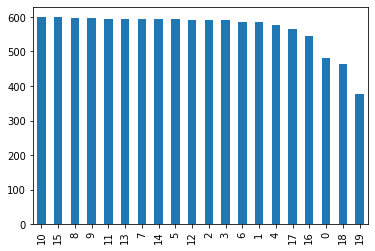

In [17]:
data['target'].value_counts().plot(kind='bar')

In [18]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


데이터 프레임으로부터 다시 메일 본문과 레이블을 분리하고, 데스트 데이터를 불러옴

In [19]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

vocab_size = 10000
num_classes = 20

vocab_size는 이번에 실습에 사용할 최대 단어 개수
케라스 토크나이저를 사용하면 빈도수 순으로 인덱스를 부여하므로, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용함

In [23]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
 tokenizer = Tokenizer(num_words=vocab_size)
 tokenizer.fit_on_texts(train_data)
 x_train = tokenizer.texts_to_matrix(train_data, mode=mode)
 x_test = tokenizer.texts_to_matrix(test_data, mode=mode)

 return x_train, x_test, tokenizer.index_word

x_train, x_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

메일 본문은 'binary' 모드로 변환하고, 훈련데이터와 테스트 데이터의 레이블은 원-핫 인코딩 수행

In [25]:
print('훈련 샘플 본문의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


빈도수 상위 1번 단어과 9999번 단어를 확인하면

In [26]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


# 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(x_train, y_train, x_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)

  score = model.evaluate(x_test, y_test, batch_size = 128, verbose=0)
  return score[1]

은닉층 2개와 모델의 과적합을 막기위하여 2개의 Dropout을 적용 

멀티 클래스 분류 문제이므로 출력층 활성화 함수로 'softmax'를 사용하였고, 손실함수로는 categorical 크로스 엔트로피를 사용함

In [32]:
modes = ['binary', 'count' , 'tfidf', 'freq']

for mode in modes:
  x_train, x_test, _ = prepare_data(train_email, test_email, mode)

  score = fit_and_evaluate(x_train, y_train, x_test, y_test)
  print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 11ms/step - loss: 2.3266 - accuracy: 0.3285 - val_loss: 1.0184 - val_accuracy: 0.8065
Epoch 2/5
80/80 [==============================] - 1s 9ms/step - loss: 0.8740 - accuracy: 0.7596 - val_loss: 0.4494 - val_accuracy: 0.8887
Epoch 3/5
80/80 [==============================] - 1s 8ms/step - loss: 0.4353 - accuracy: 0.8846 - val_loss: 0.3531 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 1s 9ms/step - loss: 0.2516 - accuracy: 0.9375 - val_loss: 0.3172 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 1s 9ms/step - loss: 0.1702 - accuracy: 0.9586 - val_loss: 0.3070 - val_accuracy: 0.9099
binary 모드의 테스트 정확도: 0.8248804807662964
Epoch 1/5
80/80 [==============================] - 1s 11ms/step - loss: 2.7604 - accuracy: 0.2521 - val_loss: 1.6224 - val_accuracy: 0.7182
Epoch 2/5
80/80 [==============================] - 1s 9ms/step - loss: 1.4770 - accuracy: 0.6251 - val_loss: 0.7591 - val_acc

freq 모드는 이 문제를 풀기위한 적절한 전처리 방법이 아닌것으로 판단됨